# STAT207 Final Project - Predicting Critical Acclaim of Video Games


Rithvik Mandumula, Zack Cardoza,Jiajun Li, Tianyi Shi

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [2]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Introduction

Our primary research goal is to build a predictive model that will effectively predict "Critical Acclaim"(if the review score of a video game is high) for new datasets. Our secondary research goal is for our chosen model to also yield reliable interpretative insights about the nature of the relationship between the variables in the dataset. Another important secondary goal is to thoroughly describe the nature of the variables and the relationships between them. This includes descriptive statistics such as distributions, means, medians, and modes of various variables, as well as how these variables interact with each other. This descriptive analysis will help contextualize the variables within the larger framework of the video game industry, offering a comprehensive understanding of the data that feeds into our primary predictive goal.

The video game industry, a dynamic and rapidly evolving sector, presents unique challenges and opportunities in understanding what drives a game’s success. One critical aspect of this success is achieving critical acclaim, a factor that can significantly influence a game's market performance and consumer reception. We aim to develop a predictive model focused on forecasting critical acclaim for video games. The motivation for building such a model stems from the potential insights it offers into the complex interplay of factors that lead to a game being critically acclaimed. These insights carry immense practical value for various stakeholders in the gaming industry.

One type of person who may find our predictive model useful would be game developers. For them, understanding the likelihood of critical acclaim is crucial in guiding development priorities and marketing strategies. Such a model could help in allocating resources more efficiently, focusing on game aspects that are likely to resonate well with critics. The predictive power of the model in identifying 'positives' is particularly valuable, as it can assist in making strategic decisions that maximize the potential for success. However, the ability to accurately identify 'negatives' is equally important, as it aids in avoiding costly investments in projects with lower chances of favorable reception (Drachen et al., 2016; El-Nasr et al., 2013). Thus, a balanced approach with high accuracy for both positives and negatives would be ideal, providing a comprehensive tool for decision-making in the intricate landscape of game development and marketing.

References: Drachen, A., et al. (2016). "Games and Analytics: The New Paradigm in Game Development." International Game Developers Association. El-Nasr, M. S., Drachen, A., & Canossa, A. (2013). "Game Analytics - Maximizing the Value of Player Data." Springer London.

## 2. Dataset Discussion

I used the Video Games Dataset Originally collected by Dr. Joe Cox which the link is https://corgis-edu.github.io/corgis/datasets/csv/video_games/video_games.csv. This dataset was downloaded on 9/8/2023. The rows in the dataset represents the sales and playtime of over a thousand video games released between 2004 and 2010. The playtime information was collected from crowd-sourced data on “How Long to Beat”.

I don't think the dataset has included all possible types of observations since it only collected data from 2004 to 2010, the dataset does not include sales and playtime through the time besides 2004 to 2010. While the data might provide valuable insights for the specified period, it may not be wholly indicative of current or future trends, so developers might not feel the prediction model is useful for their games. The three variables I intend to explore are Length.All PlayStyles.Average, Metrics.Review Score, Metadata.Genres. Length.All PlayStyles.Average represents the mean time that players reported completing each game in any way, in hours, and it is the average over all the other categories. Metrics.Review Score represents the typical review score for each game, out of 100. Metadata.Genres represents the genre that each game belongs to.

In [3]:
#Read csv file and display the first 5 rows of the dataframe
df = pd.read_csv("video_games.csv")
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [4]:
#Number of rows before cleaning
df.shape[0]

1212

We are going to use Metrics.Review Score as our response variable where review score over 80 will be marked as "1", otherwise, "0". We intend to use 'Metrics.Used Price', 'Metadata.Publishers', 'Length.Completionists.Average', 'Length.Main + Extras.Average', 'Length.All PlayStyles.Average', 'Features.Max Players' as explanatory variables for our predictive model. These variables were chosen because they collectively offer a comprehensive overview of both the quantitative and qualitative aspects of video games that are likely to influence their critical success. By analyzing these variables, the model aims to uncover patterns and relationships that can predict a game's likelihood of being critically acclaimed, providing valuable insights for developers, publishers, and marketers in the gaming industry.

## 3. Dataset Cleaning

In [5]:
df1 = df[['Metrics.Review Score', 'Metrics.Used Price', 'Metadata.Publishers', 'Length.Completionists.Average', 'Length.Main + Extras.Average', 'Length.All PlayStyles.Average', 'Features.Max Players']]
df1

,Metrics.Review Score,Metrics.Used Price,Metadata.Publishers,Length.Completionists.Average,Length.Main + Extras.Average,Length.All PlayStyles.Average,Features.Max Players
0,85,24.95,Nintendo,29.766667,24.916667,22.716667,1
1,89,14.95,Ubisoft,0.000000,9.750000,10.100000,1
2,81,22.95,Nintendo,10.000000,3.850000,4.566667,2
3,81,12.95,Sony,0.000000,0.000000,0.000000,1
4,61,14.95,Activision,72.566667,12.766667,13.250000,1
...,...,...,...,...,...,...,...
1207,71,17.95,NaN,12.050000,11.500000,10.083333,1
1208,62,17.95,NaN,0.000000,0.000000,0.000000,1
1209,51,15.95,NaN,0.000000,0.000000,0.000000,1
1210,64,17.95,NaN,12.050000,11.500000,10.083333,2


In [6]:
df1.isna().sum()

Metrics.Review Score               0
Metrics.Used Price                 0
Metadata.Publishers              264
Length.Completionists.Average      0
Length.Main + Extras.Average       0
Length.All PlayStyles.Average      0
Features.Max Players               0
dtype: int64

In [7]:
df1.dtypes

Metrics.Review Score               int64
Metrics.Used Price               float64
Metadata.Publishers               object
Length.Completionists.Average    float64
Length.Main + Extras.Average     float64
Length.All PlayStyles.Average    float64
Features.Max Players               int64
dtype: object

In [8]:
df1 = df1.dropna()
df1.head()

,Metrics.Review Score,Metrics.Used Price,Metadata.Publishers,Length.Completionists.Average,Length.Main + Extras.Average,Length.All PlayStyles.Average,Features.Max Players
0,85,24.95,Nintendo,29.766667,24.916667,22.716667,1
1,89,14.95,Ubisoft,0.000000,9.750000,10.100000,1
2,81,22.95,Nintendo,10.000000,3.850000,4.566667,2
3,81,12.95,Sony,0.000000,0.000000,0.000000,1
4,61,14.95,Activision,72.566667,12.766667,13.250000,1


In [9]:
#Sample size cleaning
category_counts = df1['Metadata.Publishers'].value_counts()
category_counts

Metadata.Publishers
EA                      165
Ubisoft                  92
Activision               87
Nintendo                 85
Sega                     75
THQ                      61
Sony                     60
2K                       49
Konami                   47
Capcom                   35
Namco                    33
SquareEnix               31
Midway                   23
Eidos                    22
Microsoft                21
Atari                    20
Rockstar                 12
Disney                   10
Atari,Namco               4
Nintendo,Sega             2
Sony,Ubisoft              2
Namco,Sony                2
EA,Namco                  2
Capcom,Rockstar           1
Nintendo,SquareEnix       1
EA,Sony                   1
Microsoft,SquareEnix      1
Activision,Sony           1
Capcom,Nintendo           1
Activision,Konami         1
Namco,Ubisoft             1
Name: count, dtype: int64

In [10]:
# Filter out categories with counts below 20
sparse_categories = category_counts[category_counts <= 20].index
df2 = df1[~df1['Metadata.Publishers'].isin(sparse_categories)]
df2 

,Metrics.Review Score,Metrics.Used Price,Metadata.Publishers,Length.Completionists.Average,Length.Main + Extras.Average,Length.All PlayStyles.Average,Features.Max Players
0,85,24.95,Nintendo,29.766667,24.916667,22.716667,1
1,89,14.95,Ubisoft,0.000000,9.750000,10.100000,1
2,81,22.95,Nintendo,10.000000,3.850000,4.566667,2
3,81,12.95,Sony,0.000000,0.000000,0.000000,1
4,61,14.95,Activision,72.566667,12.766667,13.250000,1
...,...,...,...,...,...,...,...
1195,67,13.95,Eidos,5.500000,0.000000,4.750000,1
1197,42,14.95,Konami,0.000000,0.000000,0.000000,1
1199,68,19.95,EA,0.000000,0.000000,0.000000,1
1204,58,11.95,Ubisoft,5.050000,4.516667,5.066667,1


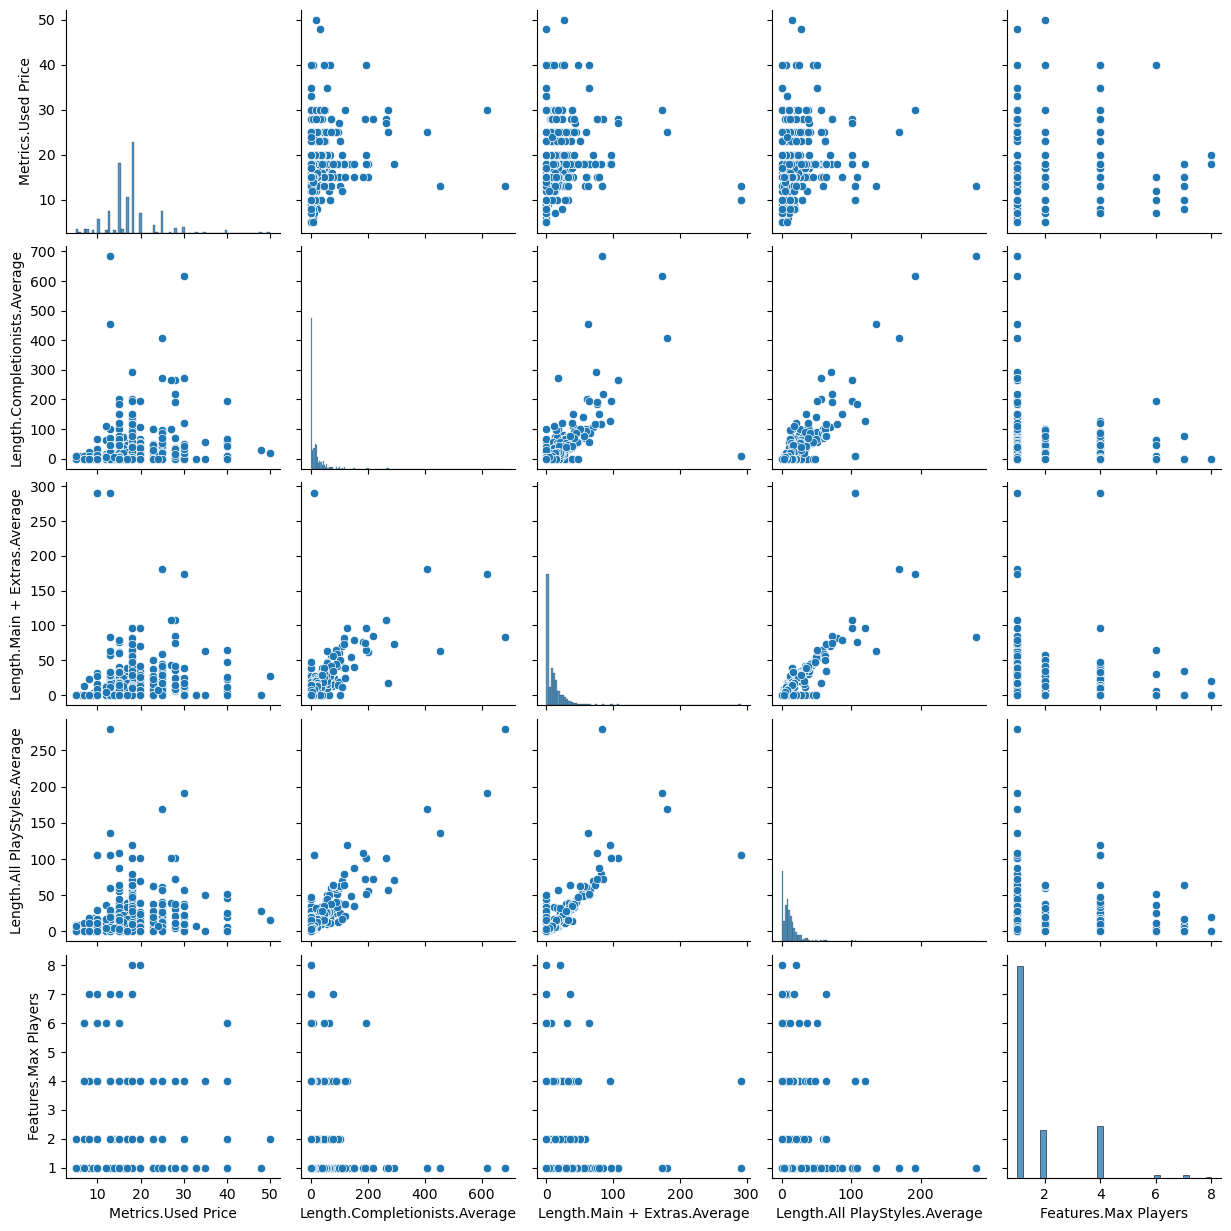

In [11]:
#Scatterplots of each pair of numerical explanatory variables
numerical_columns = ['Metrics.Used Price', 'Length.Completionists.Average', 
                     'Length.Main + Extras.Average', 'Length.All PlayStyles.Average', 'Features.Max Players']
df_numerical = df2[numerical_columns]
sns.pairplot(df_numerical)

<Axes: >

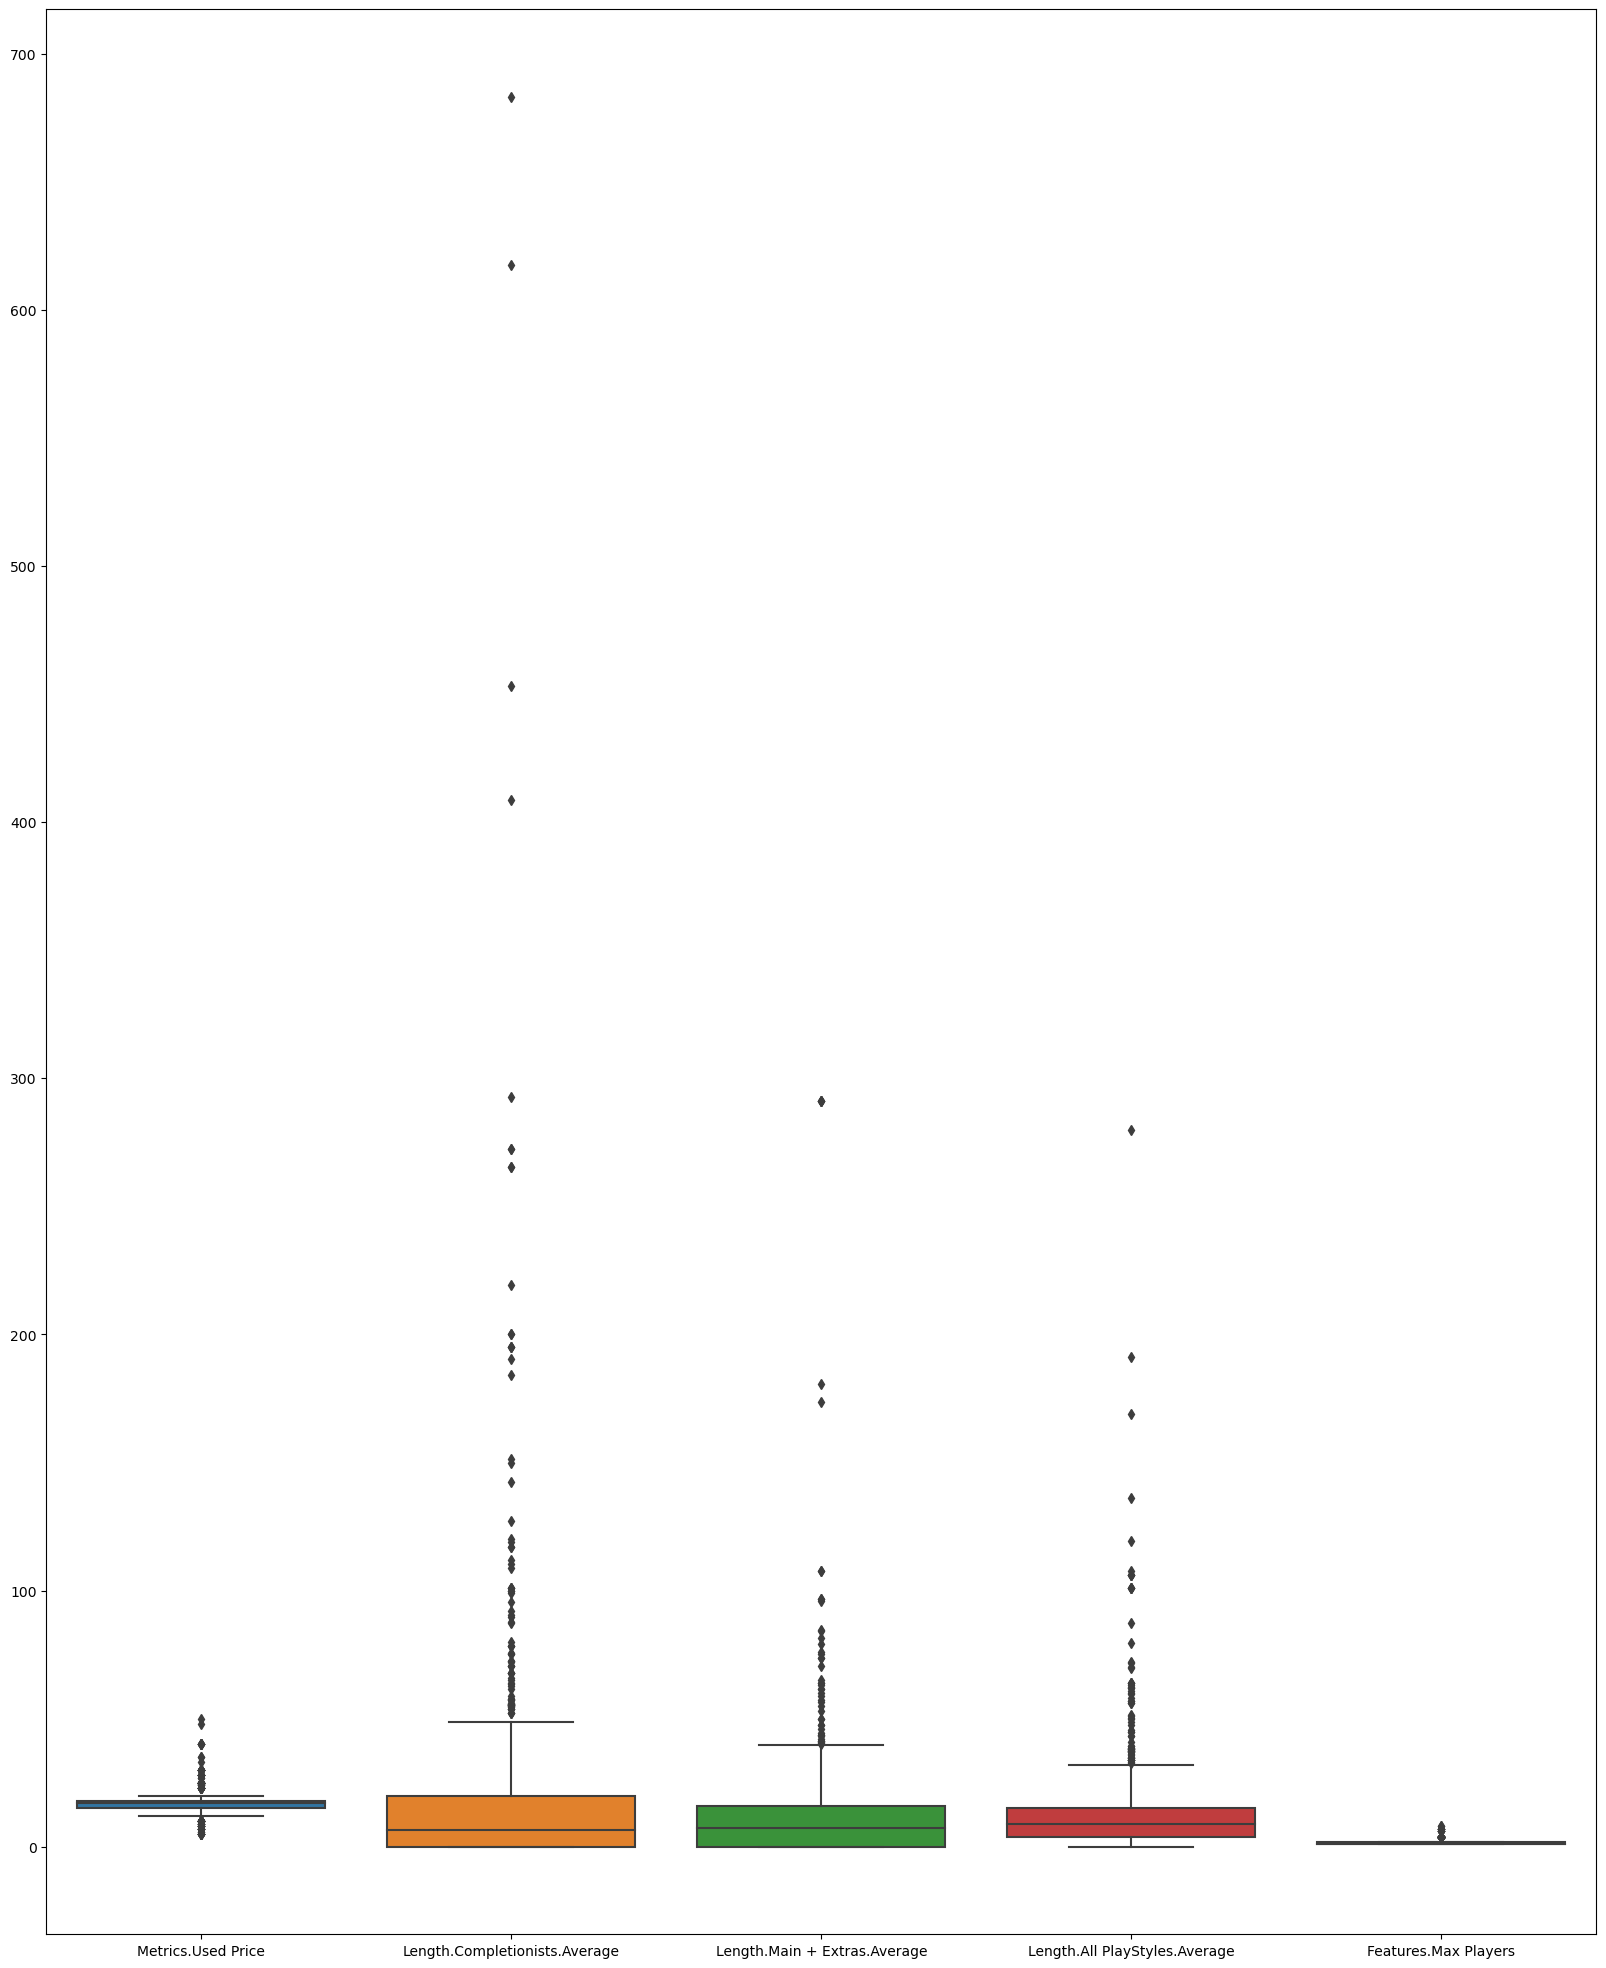

In [12]:
plt.figure(figsize=(20, 25))
sns.boxplot(df_numerical)

There are some outliers in the pairplots.

Boxplot is limited and sensitive to some extent. It should however be noted that if you remove outliers using fixed cutoff (beyond 1.5x IQR) then may not work for all datasets.

Pros of Dropping Outliers:

Removing them can lead to a model that better represents the underlying relationship between variables. Also, a dataset without outliers can be easier to understand and interpret, as it may display clearer patterns and trends and, the model may generalize better to unseen data, assuming the outliers are not representative of future data points.

Cons of Dropping Outliers:

Outliers can contain valuable information. If they are indicative of a real phenomenon or trend, removing them can lead to a loss of insights. In addition, a model trained without outliers may be sensitive to them in new datasets, leading to poorer performance when applied in practice. Without a clear criterion for their removal, the validity of the modeling process may be questioned as well.

We decide to not drop the outliers as we believe keeping outliers in the dataset ensures a complete representation of all observed phenomena, which can be crucial for certain types of analyses where extreme values are of particular interest.

## 4. Preliminary Analysis

<Axes: xlabel='Metadata.Publishers', ylabel='Metrics.Review Score'>

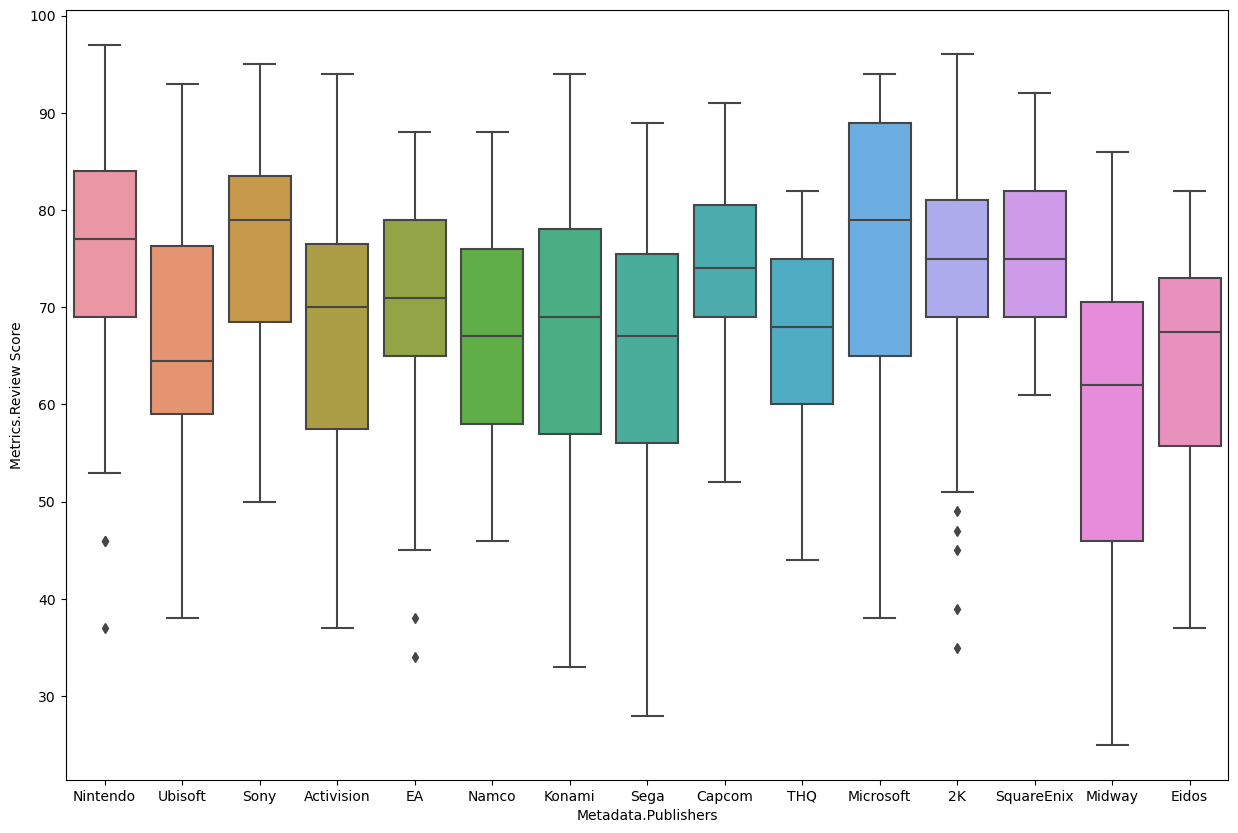

In [13]:
#categorical and numerical variable
plt.figure(figsize=(15, 10))
sns.boxplot(x='Metadata.Publishers',y='Metrics.Review Score',data=df2)


<Axes: xlabel='Metrics.Used Price', ylabel='Metrics.Review Score'>

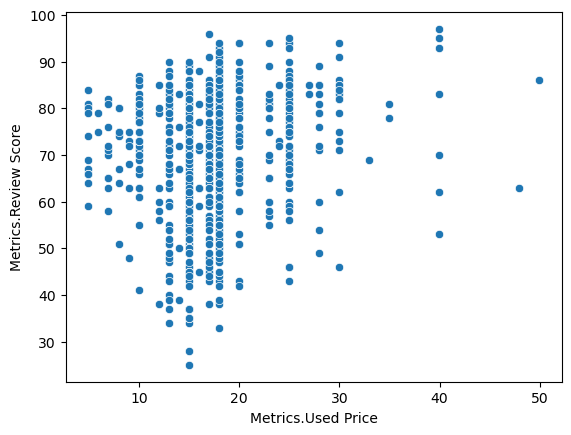

In [14]:
sns.scatterplot(x='Metrics.Used Price', y ='Metrics.Review Score', data =df2)

<Axes: xlabel='Length.Completionists.Average', ylabel='Metrics.Review Score'>

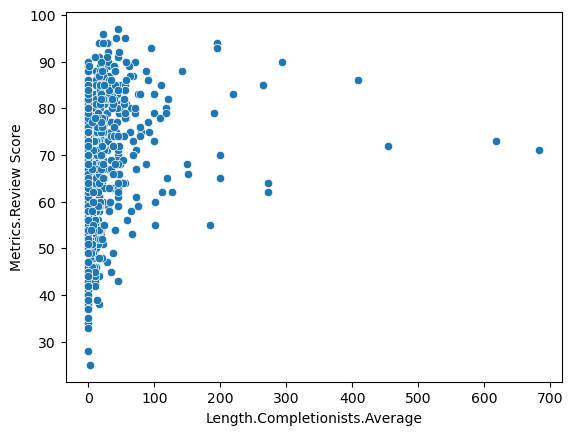

In [15]:
sns.scatterplot(x='Length.Completionists.Average', y ='Metrics.Review Score', data =df2)

<Axes: xlabel='Length.Main + Extras.Average', ylabel='Metrics.Review Score'>

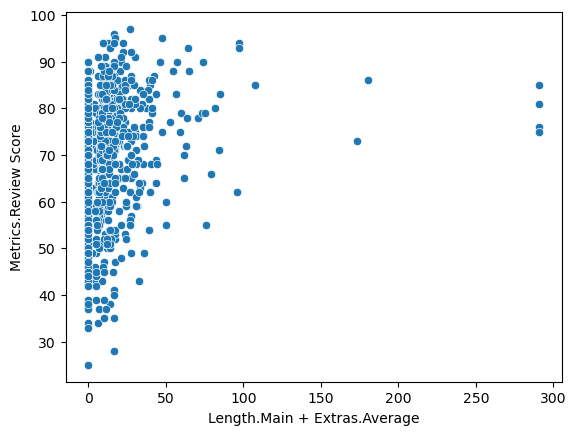

In [16]:
sns.scatterplot(x='Length.Main + Extras.Average', y ='Metrics.Review Score', data =df2)

<Axes: xlabel='Length.All PlayStyles.Average', ylabel='Metrics.Review Score'>

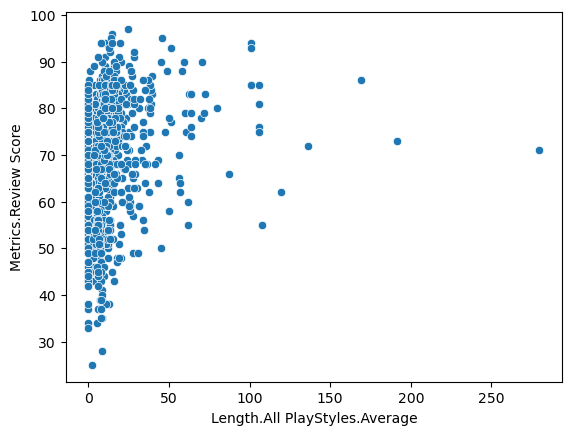

In [17]:
sns.scatterplot(x='Length.All PlayStyles.Average', y ='Metrics.Review Score', data =df2)

<Axes: xlabel='Features.Max Players', ylabel='Metrics.Review Score'>

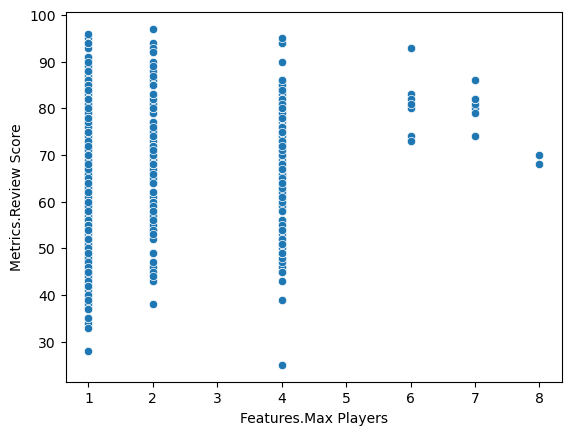

In [18]:
sns.scatterplot(x='Features.Max Players', y ='Metrics.Review Score', data =df2)

Based on these five scatterplots, we can see that Metrics.Used Price may has the strongest relationship with Metrics.Review Score since their relationship is tend to be linear.

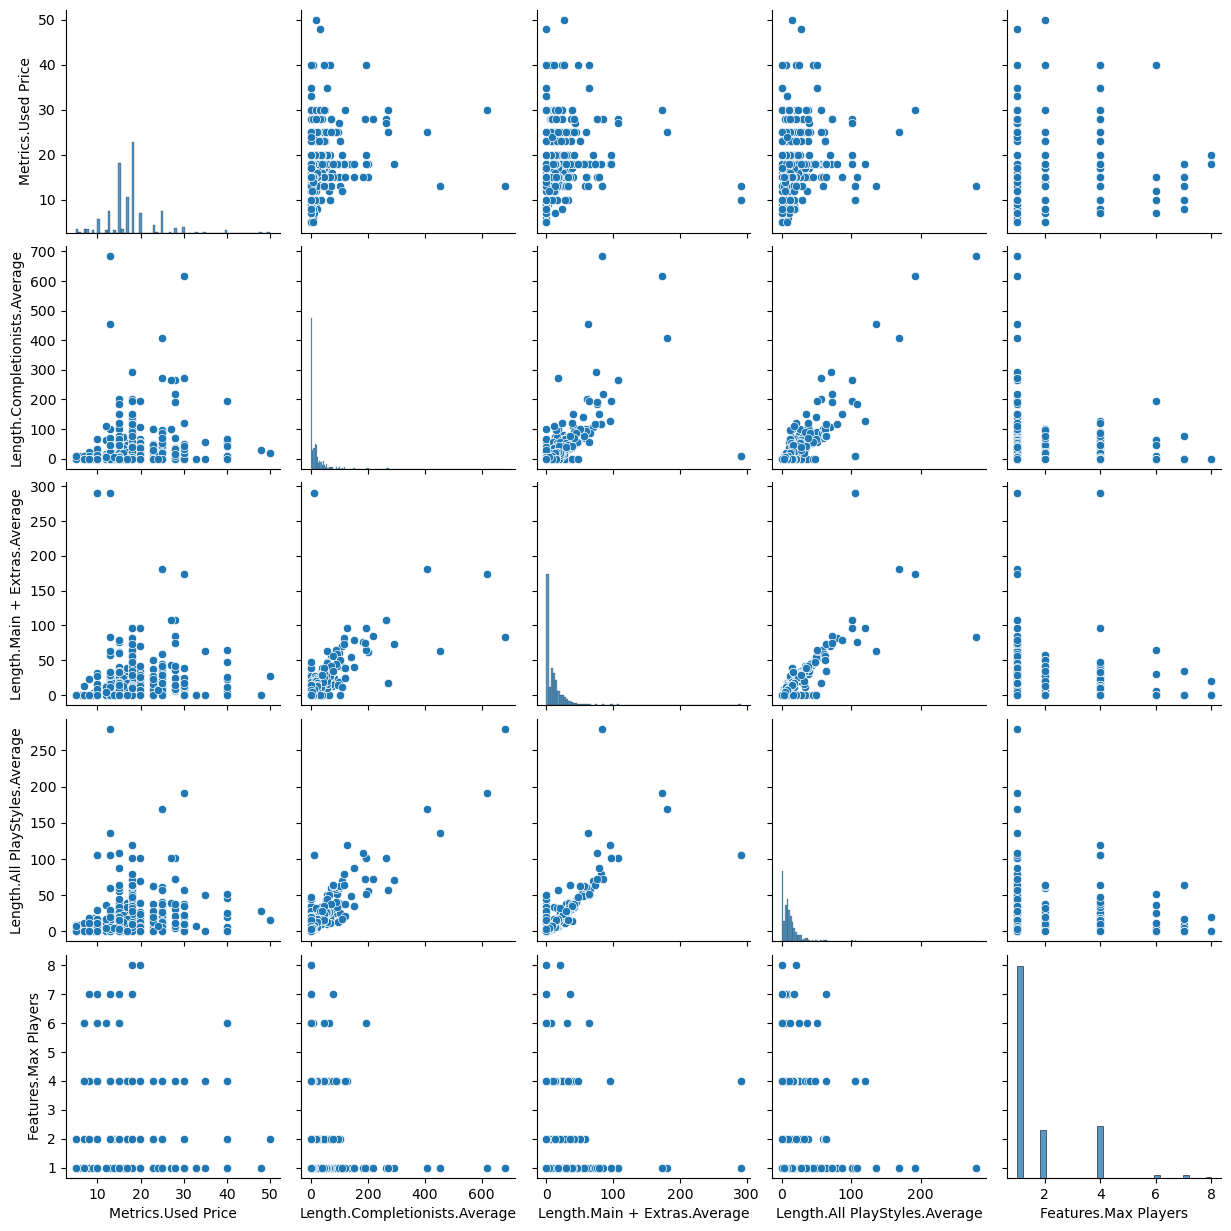

In [19]:
sns.pairplot(df_numerical)

<Axes: xlabel='Metadata.Publishers', ylabel='Metrics.Used Price'>

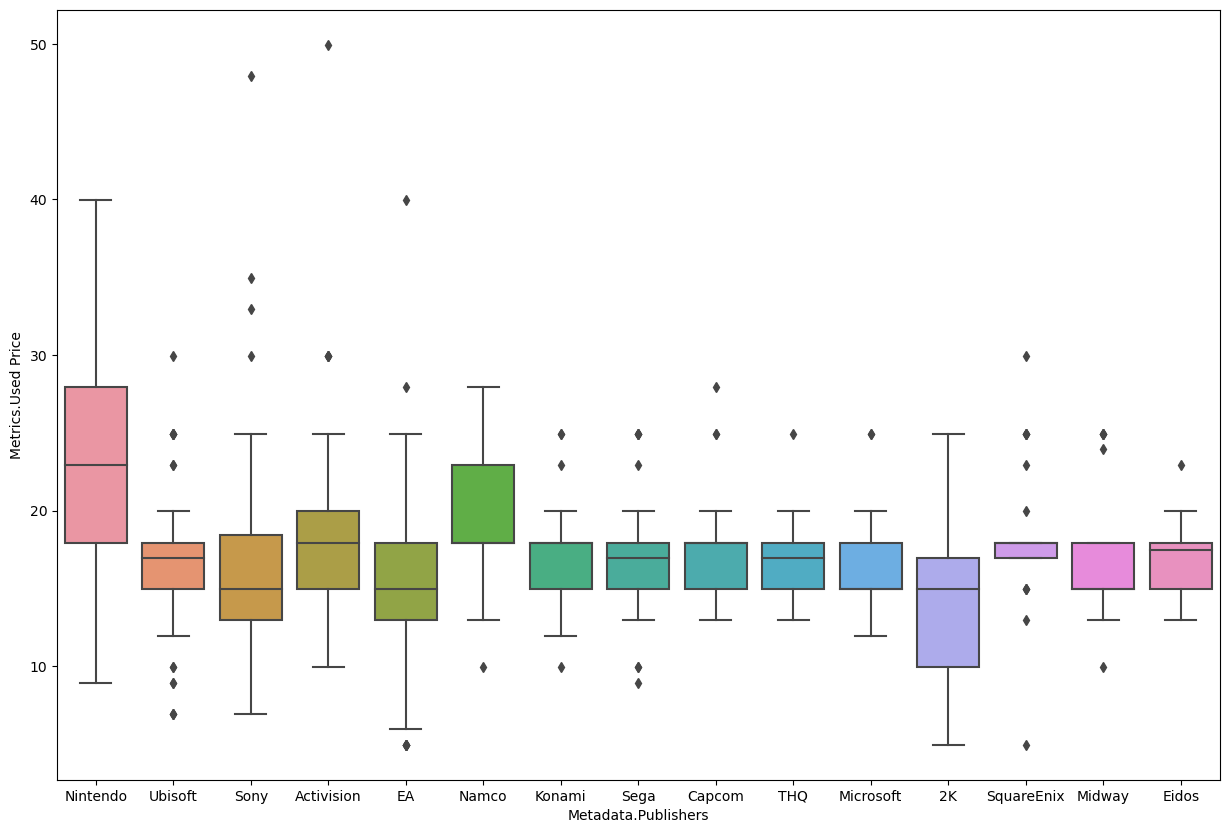

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Metadata.Publishers',y='Metrics.Used Price',data=df2)

<Axes: xlabel='Metadata.Publishers', ylabel='Length.Completionists.Average'>

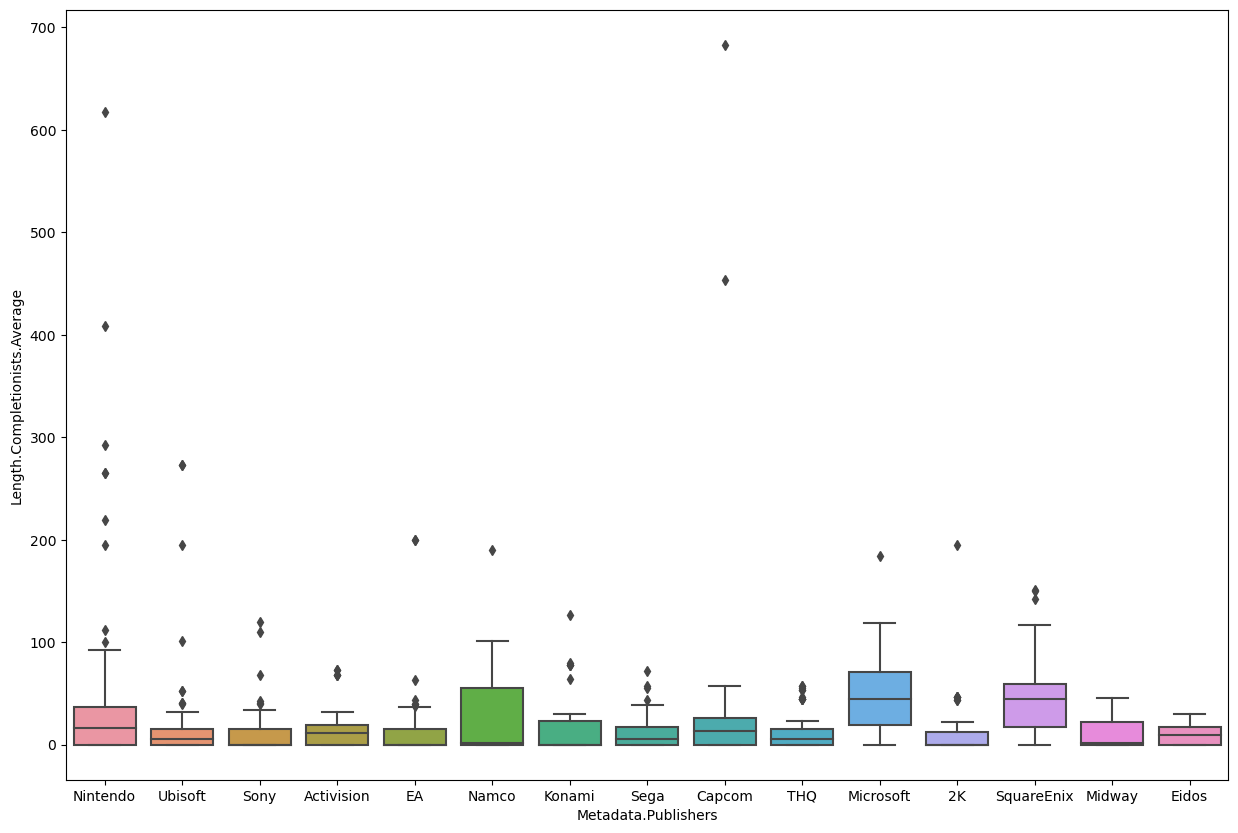

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Metadata.Publishers',y='Length.Completionists.Average',data=df2)

<Axes: xlabel='Metadata.Publishers', ylabel='Length.Main + Extras.Average'>

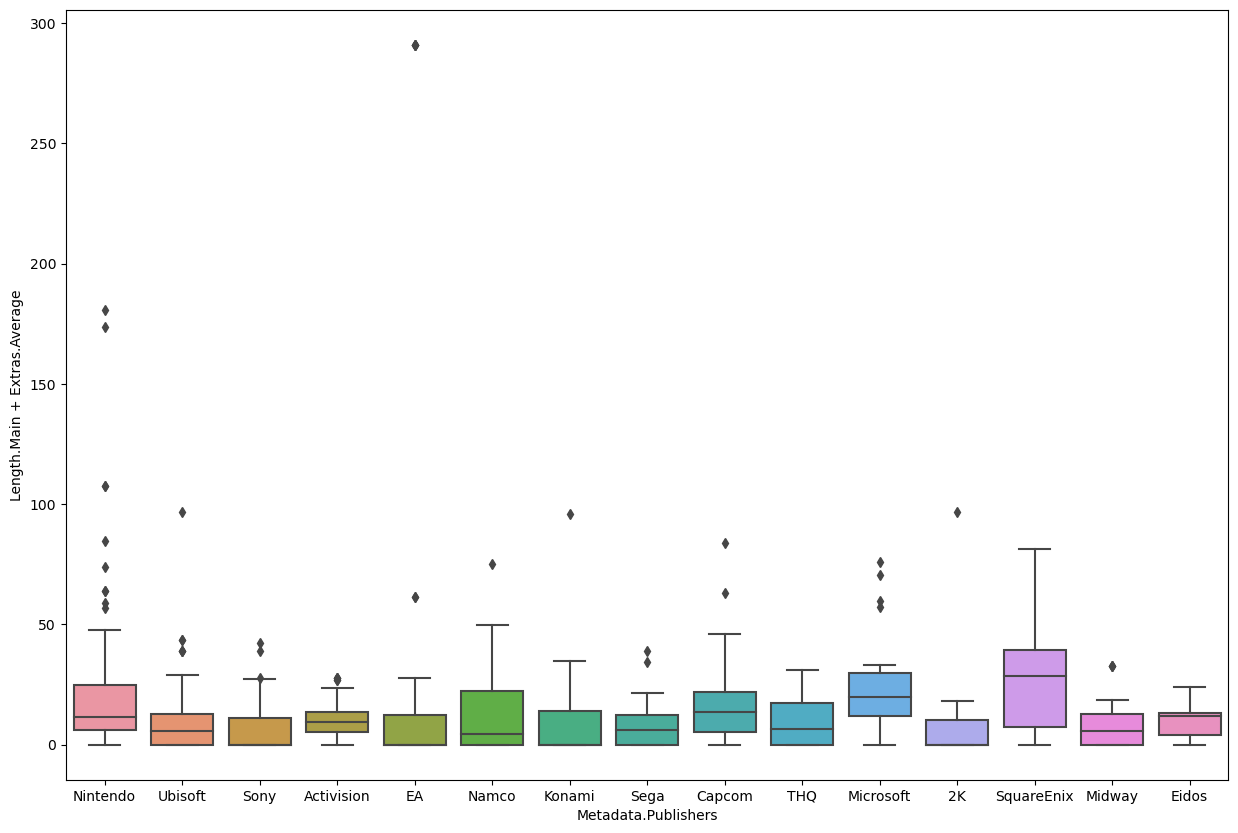

In [22]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Metadata.Publishers',y='Length.Main + Extras.Average',data=df2)

<Axes: xlabel='Metadata.Publishers', ylabel='Length.All PlayStyles.Average'>

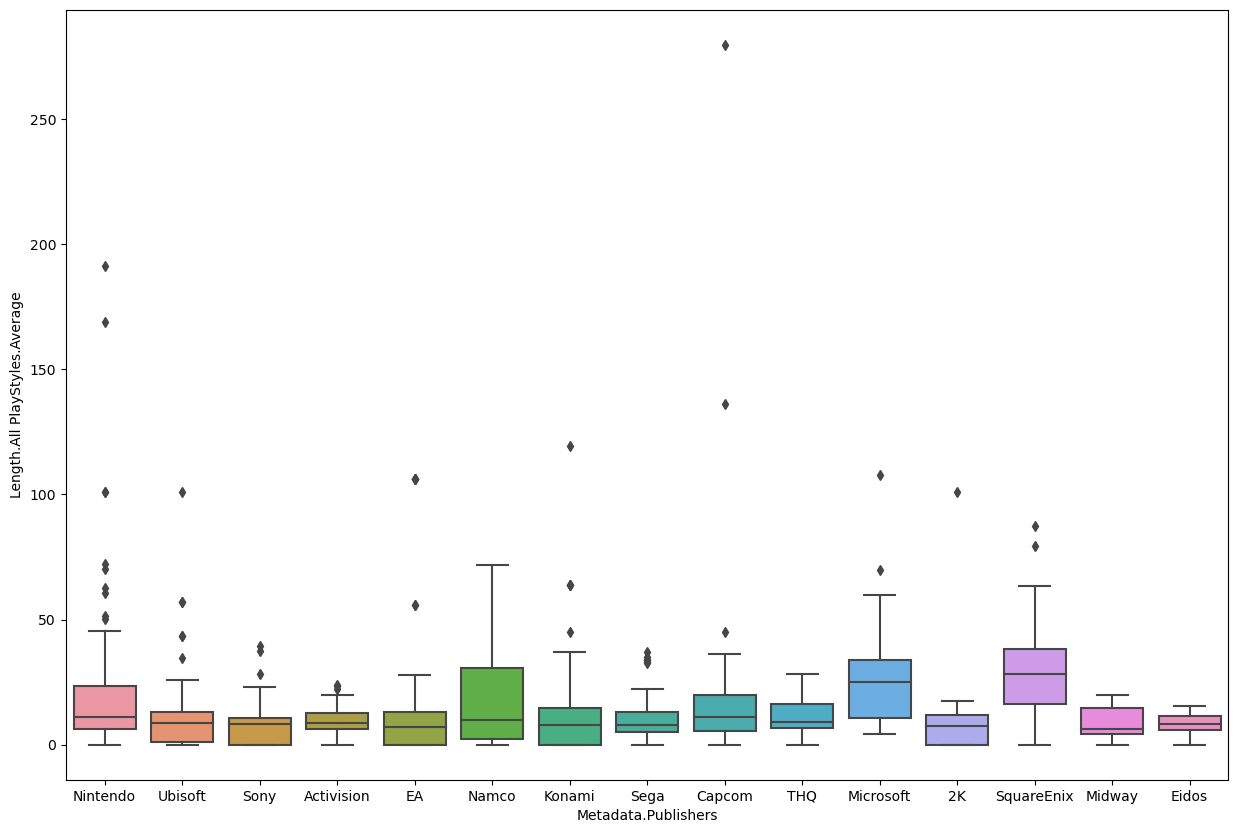

In [23]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Metadata.Publishers',y='Length.All PlayStyles.Average',data=df2)

<Axes: xlabel='Metadata.Publishers', ylabel='Features.Max Players'>

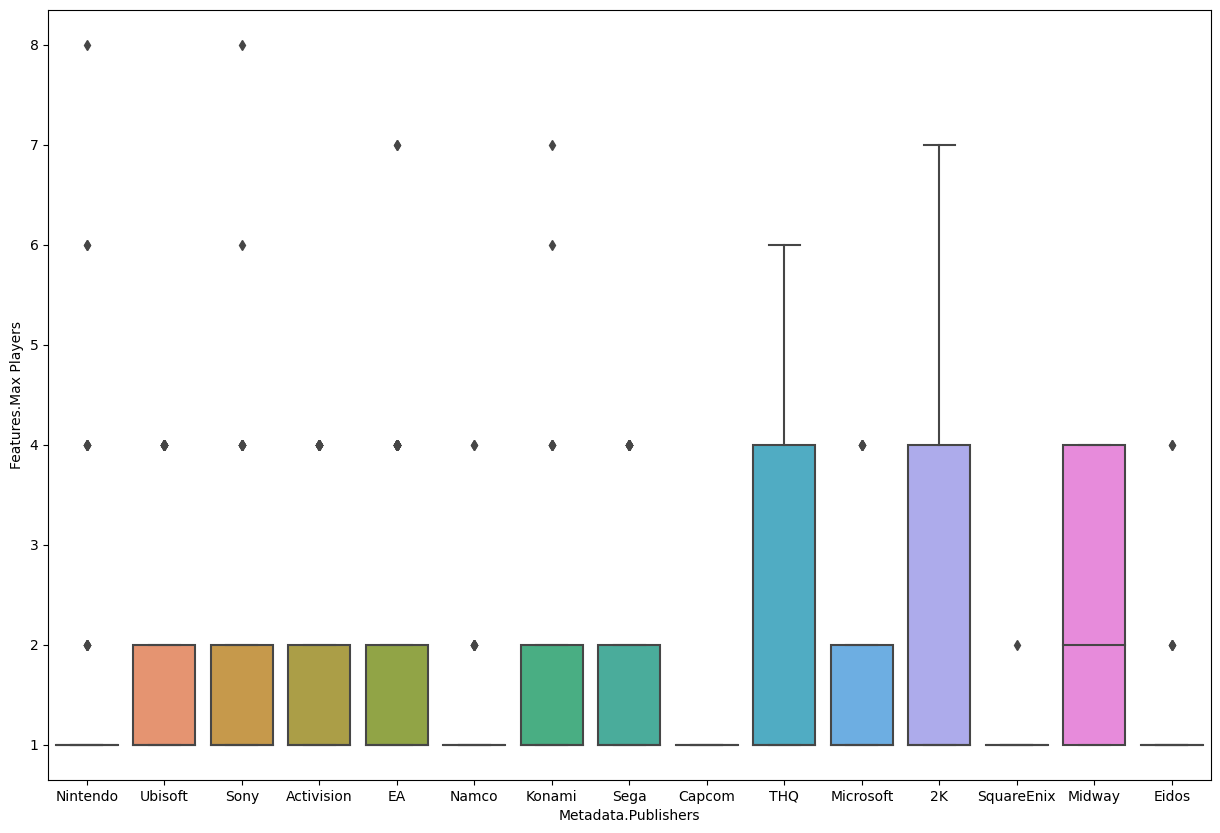

In [24]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Metadata.Publishers',y='Features.Max Players',data=df2)

In [25]:
df_numerical.corr()

,Metrics.Used Price,Length.Completionists.Average,Length.Main + Extras.Average,Length.All PlayStyles.Average,Features.Max Players
Metrics.Used Price,1.000000,0.197663,0.127982,0.162682,-0.024686
Length.Completionists.Average,0.197663,1.000000,0.515423,0.853430,-0.064814
Length.Main + Extras.Average,0.127982,0.515423,1.000000,0.775512,0.006618
Length.All PlayStyles.Average,0.162682,0.853430,0.775512,1.000000,-0.035645
Features.Max Players,-0.024686,-0.064814,0.006618,-0.035645,1.000000


Yes, we can find out that Length.All PlayStyles.Average and Length.Completionists.Average has strong relationship(0.822242). Moreover, Length.Main + Extras.Average and Length.All PlayStyles.Average also has strong relationship(0.794351)

In [27]:
import warnings
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning
warnings.filterwarnings('ignore',category = PerfectSeparationWarning)
df2.loc[:, 'y'] = np.where(df2['Metrics.Review Score'] >= 80, 1, 0)
df2

,Metrics.Review Score,Metrics.Used Price,Metadata.Publishers,Length.Completionists.Average,Length.Main + Extras.Average,Length.All PlayStyles.Average,Features.Max Players,y
0,85,24.95,Nintendo,29.766667,24.916667,22.716667,1,1
1,89,14.95,Ubisoft,0.000000,9.750000,10.100000,1,1
2,81,22.95,Nintendo,10.000000,3.850000,4.566667,2,1
3,81,12.95,Sony,0.000000,0.000000,0.000000,1,1
4,61,14.95,Activision,72.566667,12.766667,13.250000,1,0
...,...,...,...,...,...,...,...,...
1195,67,13.95,Eidos,5.500000,0.000000,4.750000,1,0
1197,42,14.95,Konami,0.000000,0.000000,0.000000,1,0
1199,68,19.95,EA,0.000000,0.000000,0.000000,1,0
1204,58,11.95,Ubisoft,5.050000,4.516667,5.066667,1,0


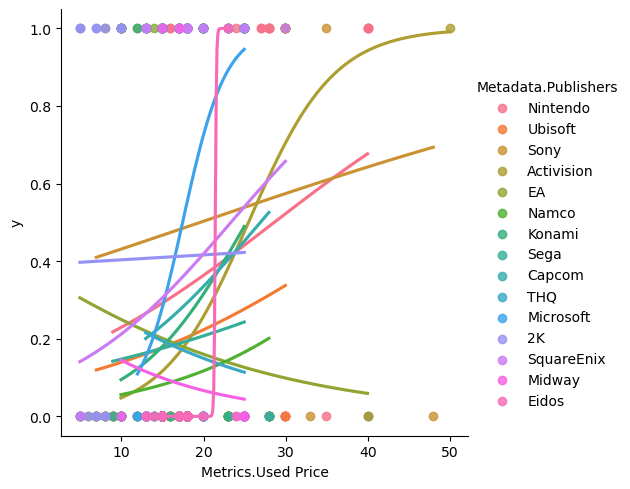

In [32]:
sns.lmplot(x='Metrics.Used Price',y='y',hue='Metadata.Publishers',logistic = True, ci =False,data =df2)
plt.show()

/Users/lijiajun/miniconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


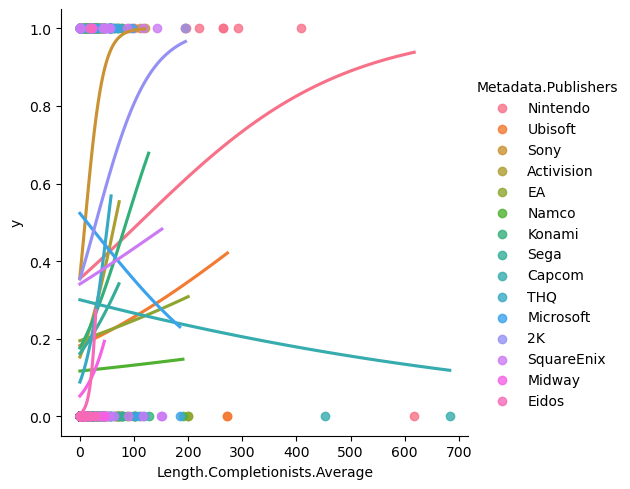

In [33]:
sns.lmplot(x='Length.Completionists.Average',y='y',hue='Metadata.Publishers',logistic = True, ci =False,data =df2)
plt.show()

/Users/lijiajun/miniconda3/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


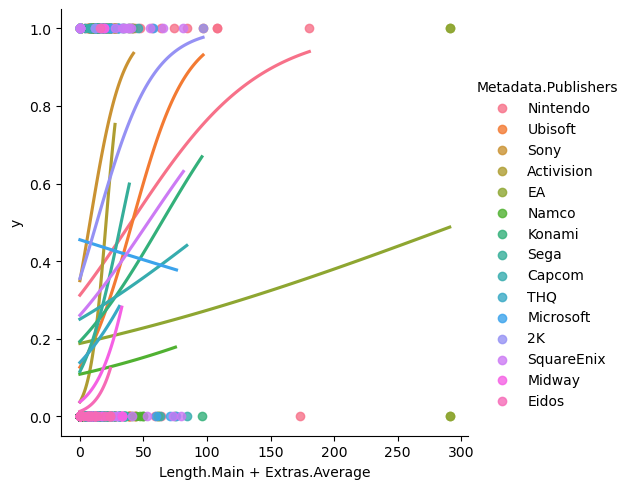

In [34]:
sns.lmplot(x='Length.Main + Extras.Average',y='y',hue='Metadata.Publishers',logistic = True, ci =False,data =df2)
plt.show()

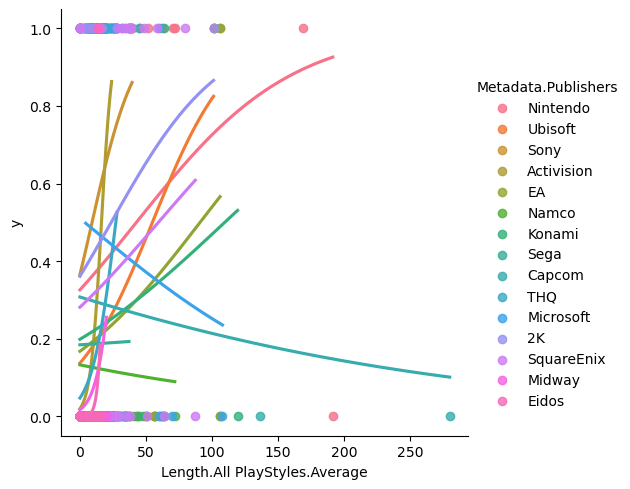

In [35]:
sns.lmplot(x='Length.All PlayStyles.Average',y='y',hue='Metadata.Publishers',logistic = True, ci =False,data =df2)
plt.show()

In [ ]:
sns.lmplot(x='Features.Max Players',y='y',hue='Metadata.Publishers',logistic = True, ci =False,data =df2)
plt.show()

## 5. Model Data Preprocessing

In [21]:
df2.loc[:, 'y'] = np.where(df2['Metrics.Review Score'] >= 80, 1, 0)
df2.head()

,Metrics.Review Score,Metrics.Used Price,Metadata.Publishers,Length.Completionists.Average,Length.Main + Extras.Average,Length.All PlayStyles.Average,Features.Max Players,y
0,85,24.95,Nintendo,29.766667,24.916667,22.716667,1,1
1,89,14.95,Ubisoft,0.000000,9.750000,10.100000,1,1
2,81,22.95,Nintendo,10.000000,3.850000,4.566667,2,1
3,81,12.95,Sony,0.000000,0.000000,0.000000,1,1
4,61,14.95,Activision,72.566667,12.766667,13.250000,1,0


In [37]:
#Features Matrix
df_x = df2.drop(['y'], axis=1)
df_x.head()
#Target Array
df_y = df2['y']
df_y.head()

0    1
1    1
2    1
3    1
4    0
Name: y, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler
scaler_training = StandardScaler()
scaled_expl_vars = scaler_training.fit_transform(df_x[['Metrics.Used Price', 'Length.Completionists.Average', 
                     'Length.Main + Extras.Average', 'Length.All PlayStyles.Average', 'Features.Max Players']])
df_numerical_scaled = pd.DataFrame(scaled_expl_vars, columns=['Metrics.Used Price', 'Length.Completionists.Average', 
                     'Length.Main + Extras.Average', 'Length.All PlayStyles.Average', 'Features.Max Players'])
df_numerical_scaled

,Metrics.Used Price,Length.Completionists.Average,Length.Main + Extras.Average,Length.All PlayStyles.Average,Features.Max Players
0,1.451637,0.186591,0.480868,0.448387,-0.576887
1,-0.455466,-0.410078,-0.113820,-0.167272,-0.576887
2,1.070217,-0.209629,-0.345160,-0.437284,0.198715
3,-0.836887,-0.410078,-0.496120,-0.660125,-0.576887
4,-0.455466,1.044511,0.004464,-0.013561,-0.576887
...,...,...,...,...,...
881,-0.646177,-0.299831,-0.496120,-0.428338,-0.576887
882,-0.455466,-0.410078,-0.496120,-0.660125,-0.576887
883,0.498086,-0.410078,-0.496120,-0.660125,-0.576887
884,-1.027597,-0.308852,-0.319020,-0.412885,-0.576887


In [39]:
cat_df = df_x['Metadata.Publishers']
indicator_df = pd.get_dummies(cat_df, drop_first=True, dtype=int)
indicator_df

,Activision,Capcom,EA,Eidos,Konami,Microsoft,Midway,Namco,Nintendo,Sega,Sony,SquareEnix,THQ,Ubisoft
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1197,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1199,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1204,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
df_x = pd.concat([df_numerical_scaled.reset_index(drop=True), indicator_df.reset_index(drop=True)], axis=1)
df_x

,Metrics.Used Price,Length.Completionists.Average,Length.Main + Extras.Average,Length.All PlayStyles.Average,Features.Max Players,Activision,Capcom,EA,Eidos,Konami,Microsoft,Midway,Namco,Nintendo,Sega,Sony,SquareEnix,THQ,Ubisoft
0,1.451637,0.186591,0.480868,0.448387,-0.576887,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-0.455466,-0.410078,-0.113820,-0.167272,-0.576887,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.070217,-0.209629,-0.345160,-0.437284,0.198715,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,-0.836887,-0.410078,-0.496120,-0.660125,-0.576887,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,-0.455466,1.044511,0.004464,-0.013561,-0.576887,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,-0.646177,-0.299831,-0.496120,-0.428338,-0.576887,0,0,0,1,0,0,0,0,0,0,0,0,0,0
882,-0.455466,-0.410078,-0.496120,-0.660125,-0.576887,0,0,0,0,1,0,0,0,0,0,0,0,0,0
883,0.498086,-0.410078,-0.496120,-0.660125,-0.576887,0,0,1,0,0,0,0,0,0,0,0,0,0,0
884,-1.027597,-0.308852,-0.319020,-0.412885,-0.576887,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
df = pd.concat([df_x.reset_index(drop=True), df_y.reset_index(drop=True)], axis=1)
df

,Metrics.Used Price,Length.Completionists.Average,Length.Main + Extras.Average,Length.All PlayStyles.Average,Features.Max Players,Activision,Capcom,EA,Eidos,Konami,Microsoft,Midway,Namco,Nintendo,Sega,Sony,SquareEnix,THQ,Ubisoft,y
0,1.451637,0.186591,0.480868,0.448387,-0.576887,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,-0.455466,-0.410078,-0.113820,-0.167272,-0.576887,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,1.070217,-0.209629,-0.345160,-0.437284,0.198715,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,-0.836887,-0.410078,-0.496120,-0.660125,-0.576887,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,-0.455466,1.044511,0.004464,-0.013561,-0.576887,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,-0.646177,-0.299831,-0.496120,-0.428338,-0.576887,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
882,-0.455466,-0.410078,-0.496120,-0.660125,-0.576887,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
883,0.498086,-0.410078,-0.496120,-0.660125,-0.576887,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
884,-1.027597,-0.308852,-0.319020,-0.412885,-0.576887,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## 6. Feature Selection with k-Fold Cross-Validation

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
cross_val

KFold(n_splits=5, random_state=100, shuffle=True)

The elastic net regression was chosen as the regularization model due to it combining the advantages of the Lasso and Ridge methods while eliminating the common weaknesses of those methods, such as handling multicollinearity and reducing overfitting.

In [43]:
temp_list=[]
for i in np.arange(0,1,0.01):
    en_mod = ElasticNet(alpha=i, l1_ratio=0.7)
    auc = cross_val_score(en_mod, df_x, df_y, cv=cross_val, scoring="roc_auc")
    mean_auc = auc.mean()
    temp_list.append([i, mean_auc])
temp_list
df_output = pd.DataFrame(temp_list, columns=['lambda','mean_auc'])
df_output

/Users/lijiajun/miniconda3/lib/python3.8/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/lijiajun/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/lijiajun/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.857e+01, tolerance: 1.328e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

,lambda,mean_auc
0,0.00,0.685853
1,0.01,0.676040
2,0.02,0.656614
3,0.03,0.646094
4,0.04,0.639583
...,...,...
95,0.95,0.500000
96,0.96,0.500000
97,0.97,0.500000
98,0.98,0.500000


In [44]:
df_output.nlargest(1, 'mean_auc')

,lambda,mean_auc
0,0.0,0.685853


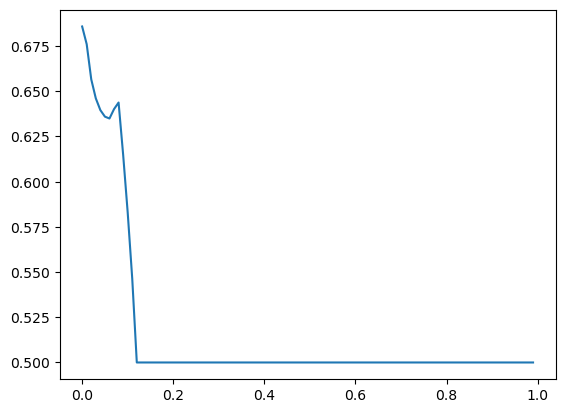

In [45]:
plt.plot(df_output['lambda'].values, df_output['mean_auc'].values)

Therefore, the lambda value with the highest or "peak" average test AUC score is at lambda = 0.

## 7. Best Model Discussion

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [47]:
#FINAL MODEL
en_mod_final = ElasticNet(alpha=0, l1_ratio=0.7)
en_mod_final.fit(df_x, df_y)

/Users/lijiajun/miniconda3/lib/python3.8/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/lijiajun/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/lijiajun/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.542e+01, tolerance: 1.693e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inste

ElasticNet(alpha=0, l1_ratio=0.7)

In [48]:
df_slopes = pd.DataFrame({'en_mod_final': en_mod_final.coef_}, index=df_x.columns)
df_slopes

,en_mod_final
Metrics.Used Price,0.045050
Length.Completionists.Average,0.029140
Length.Main + Extras.Average,0.069794
Length.All PlayStyles.Average,-0.028904
Features.Max Players,0.042025
Activision,-0.216870
Capcom,-0.136819
EA,-0.221822
Eidos,-0.367187
Konami,-0.180501


In [49]:
print("Model Intercept:", en_mod_final.intercept_)

Model Intercept: 0.43240082843837246


Equation: Predicitve Probability = 0.4324 + 0.045050 * Metrics.Used Price + 0.029140 * Length.Completionists.Average + 0.069794 * Length.Main_Extras.Average + -0.028904 * Length.All PlayStyles.Average + 0.042025 * Features.Max Players + -0.216870 * Activision + -0.136819 * Capcom + -0.221822 * EA + -0.367187 * Eidos + -0.180501 * Konami + -0.036990 * Microsoft + -0.352808 * Midway + -0.326233 * Namco + -0.090466 * Nintendo + -0.224529 * Sega + 0.061170 * Sony + -0.071418 * SquareEnix + -0.248025 * THQ + -0.222053 * Ubisoft

In [50]:
df_x.corr()

,Metrics.Used Price,Length.Completionists.Average,Length.Main + Extras.Average,Length.All PlayStyles.Average,Features.Max Players,Activision,Capcom,EA,Eidos,Konami,Microsoft,Midway,Namco,Nintendo,Sega,Sony,SquareEnix,THQ,Ubisoft
Metrics.Used Price,1.000000,0.197663,0.127982,0.162682,-0.024686,0.053687,0.004874,-0.169782,-0.010432,-0.019446,-0.018612,-0.002613,0.096832,0.345707,-0.036436,-0.001967,0.040957,-0.041387,-0.032261
Length.Completionists.Average,0.197663,1.000000,0.515423,0.853430,-0.064814,-0.038978,0.114369,-0.101251,-0.034742,-0.018117,0.109420,-0.026158,0.034711,0.170263,-0.054776,-0.047672,0.113838,-0.038083,-0.020197
Length.Main + Extras.Average,0.127982,0.515423,1.000000,0.775512,0.006618,-0.031394,0.034330,0.013776,-0.014309,-0.026574,0.079803,-0.024435,0.017541,0.129677,-0.058061,-0.054064,0.122388,-0.032872,-0.044445
Length.All PlayStyles.Average,0.162682,0.853430,0.775512,1.000000,-0.035645,-0.067106,0.104929,-0.062639,-0.036980,0.016687,0.123527,-0.035845,0.041575,0.140548,-0.046410,-0.069128,0.149312,-0.030446,-0.040060
Features.Max Players,-0.024686,-0.064814,0.006618,-0.035645,1.000000,-0.002088,-0.116993,0.065829,-0.041424,-0.011554,0.019453,0.065472,-0.057994,-0.066055,-0.011901,0.011750,-0.105083,0.078236,-0.024188
Activision,0.053687,-0.038978,-0.031394,-0.067106,-0.002088,1.000000,-0.066920,-0.157856,-0.052655,-0.078101,-0.051415,-0.053870,-0.064904,-0.107493,-0.100347,-0.088935,-0.062832,-0.089727,-0.112323
Capcom,0.004874,0.114369,0.034330,0.104929,-0.116993,-0.066920,1.000000,-0.097016,-0.032361,-0.048000,-0.031599,-0.033108,-0.039889,-0.066064,-0.061672,-0.054658,-0.038616,-0.055145,-0.069032
EA,-0.169782,-0.101251,0.013776,-0.062639,0.065829,-0.157856,-0.097016,1.000000,-0.076336,-0.113225,-0.074538,-0.078097,-0.094093,-0.155836,-0.145477,-0.128932,-0.091090,-0.130081,-0.162839
Eidos,-0.010432,-0.034742,-0.014309,-0.036980,-0.041424,-0.052655,-0.032361,-0.076336,1.000000,-0.037768,-0.024863,-0.026050,-0.031386,-0.051981,-0.048526,-0.043007,-0.030385,-0.043390,-0.054317
Konami,-0.019446,-0.018117,-0.026574,0.016687,-0.011554,-0.078101,-0.048000,-0.113225,-0.037768,1.000000,-0.036878,-0.038639,-0.046553,-0.077101,-0.071976,-0.063790,-0.045068,-0.064358,-0.080566


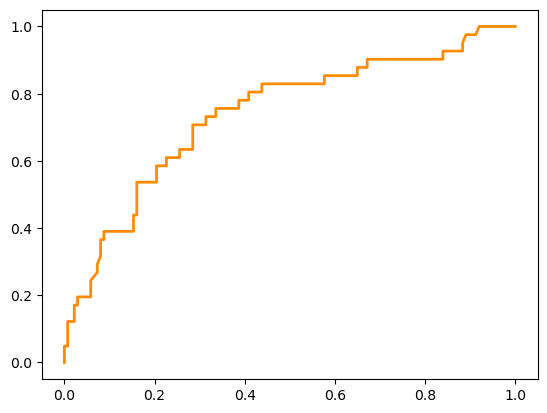

In [51]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

df_predict = pd.DataFrame()

df_predict['predictive_prob'] = en_mod_final.predict(X_test)
fprs, tprs, thresholds = roc_curve(y_true=y_test, y_score=df_predict['predictive_prob'])
auc = roc_auc_score(y_true=y_test, y_score=df_predict['predictive_prob'])
plt.plot(fprs, tprs, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.show()

In [52]:
auc

0.7396296955670287

In [53]:
from sklearn import metrics
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = metrics.confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold': [thresh],
                         'fpr':[fpr],
                         'tpr':[tpr],
                         'tn': tn,
                         'fp': fp,
                         'fn':fn,
                         'tp':tp})

for thresh in np.arange(0,0.35,.01):
    print(fpr_tpr_thresh(y_test,
                         df_predict['predictive_prob'], thresh))

   threshold       fpr  tpr  tn   fp  fn  tp
0        0.0  0.992701  1.0   1  136   0  41
   threshold       fpr  tpr  tn   fp  fn  tp
0       0.01  0.992701  1.0   1  136   0  41
   threshold       fpr  tpr  tn   fp  fn  tp
0       0.02  0.978102  1.0   3  134   0  41
   threshold       fpr  tpr  tn   fp  fn  tp
0       0.03  0.978102  1.0   3  134   0  41
   threshold       fpr  tpr  tn   fp  fn  tp
0       0.04  0.970803  1.0   4  133   0  41
   threshold       fpr  tpr  tn   fp  fn  tp
0       0.05  0.963504  1.0   5  132   0  41
   threshold       fpr  tpr  tn   fp  fn  tp
0       0.06  0.948905  1.0   7  130   0  41
   threshold       fpr  tpr  tn   fp  fn  tp
0       0.07  0.941606  1.0   8  129   0  41
   threshold       fpr  tpr  tn   fp  fn  tp
0       0.08  0.934307  1.0   9  128   0  41
   threshold      fpr      tpr  tn   fp  fn  tp
0       0.09  0.89781  0.97561  14  123   1  40
   threshold       fpr       tpr  tn   fp  fn  tp
0        0.1  0.883212  0.926829  16  121   

The best model after regularization with an elastic net model was a model with an alpha value of 0. After fitting this model to the featurs matrix and target array, we saw that none of the slopes were zeroed out. If none of the slopes were zeroed out, it suggests that the model is placing importance on all the features, and none of them have been deemed as irrelevant for the predictive task at hand. When it comes to multicollinearity, there is a possibility of this issue because there are atleast one pair of explanatory values that are highly correlated to each other such as Length.Completionists.Average and Length.All PlayStyles.Average.

Magnitude of Slopes: We have scaled the variables and addressed multicollinearity through the regularization. Therefore the coefficients are now more directly comparable in terms of their impact, and the model is less sensitive to changes in the scale of the input variables. In our case, the indicator variables 'Eido', 'Midway', and 'Namco' had the highest magnitudes of slopes which indicates a stronger impact on whether a video game has high critical acclaim or not.

Overfitting: While the fact that no slopes were zeroed out by Elastic Net suggests that all variables are being used in the model, it doesn't necessarily imply that some of our original explanatory variables were overfitting the model.

ROC/AUC: A model with an ROC curve that hugs the upper-left corner (closer to (0, 1)) indicates better performance. This means the model has a high true positive rate and a low false positive rate across different thresholds. In our case, with an AUC of 0.7397, the model has reasonable discriminatory power. It suggests that, on average, the model is definitely better than random chance at distinguishing between video games with high critical acclaim and those without. However, there is definitely room for improvement. A more agressive feature selection process be beneficial.

Threshold: I would chose a predictive probability threshold of about 0.25. This has a FPR of 0.255474 and a TPR of 0.756098. Given our model's moderate performace, I don't believe that we can achieve a perfect ratio for TPR and FPR but this threshold provides us the best balance possible out of all the other thresholds. It would indicate that on average a video game will be falsely classified with high critical acclaim 25% of the time. Also a video game that has high cricital acclaim will be accurately classified about 75% of the time.

## 8. Additional Analysis/Insight

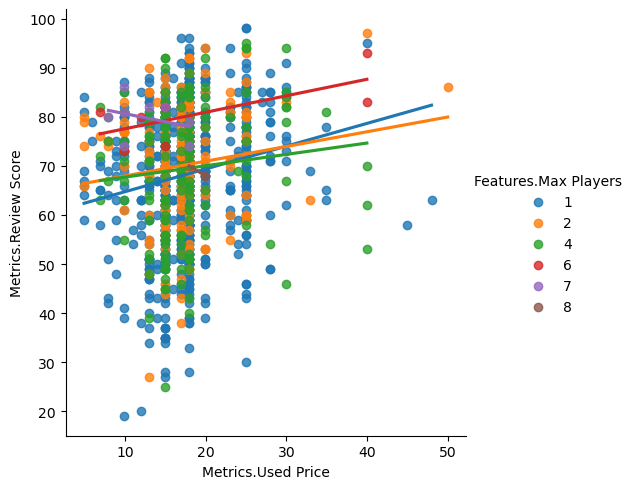

In [54]:
df_extra = pd.read_csv("video_games.csv")
sns.lmplot(x='Metrics.Used Price',y='Metrics.Review Score',hue='Features.Max Players', ci =False,data =df_extra)

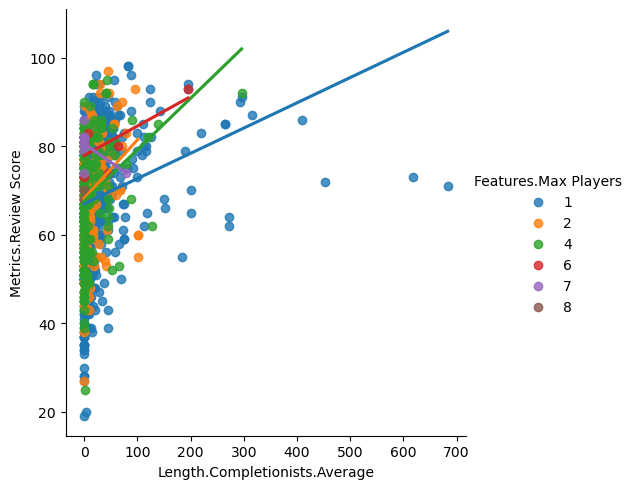

In [55]:
sns.lmplot(x='Length.Completionists.Average',y='Metrics.Review Score',hue='Features.Max Players',ci =False,data =df_extra)

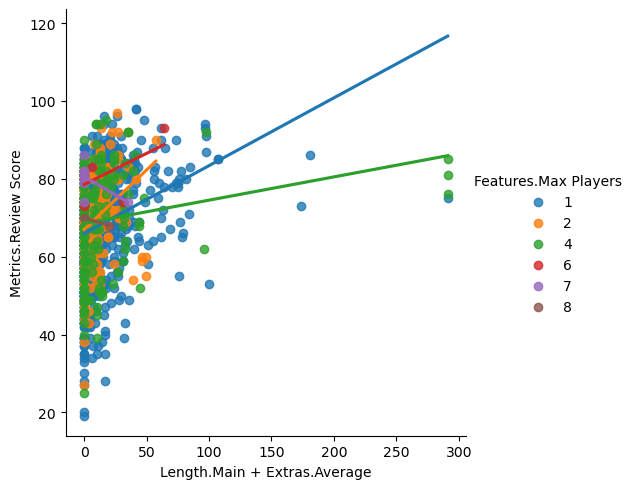

In [56]:
sns.lmplot(x='Length.Main + Extras.Average',y='Metrics.Review Score',hue='Features.Max Players',ci =False,data =df_extra)

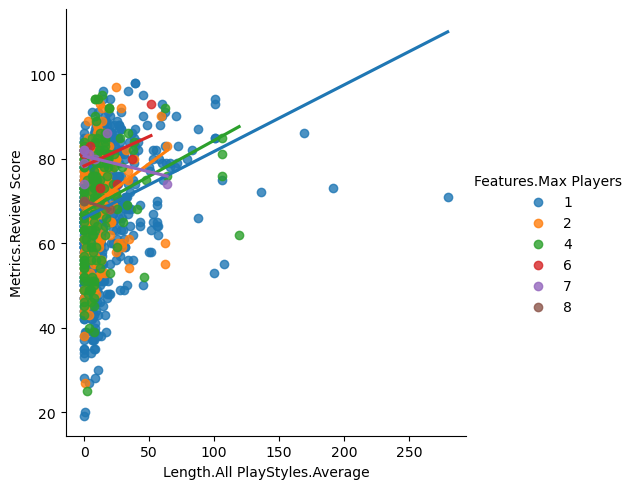

In [57]:
sns.lmplot(x='Length.All PlayStyles.Average',y='Metrics.Review Score',hue='Features.Max Players',ci =False,data =df_extra)

Although Features.Max players isn't one of our explanatory variables, one of our research goals is to thoroughly describe the nature of the variables and the relationships between them. By showing interaction effects in our research involving video game data, we gain a more nuanced and comprehensive understanding of the relationships between variables. This will help us derive insights that can also be used for future models with different explanatory variables as including interaction terms in our models can lead to better predictive accuracy.

In my additional analysis, I found that the relationship between variables like Review Score, PlayStyles.Average, Extras.Average, Used.Price, etc. change for games with different amounts of Max Players. These differences in subgroups and interactions can be valuable information for not only future model development, but also targeted game development or marketing strategies.

## 9. Conclusion

We would not recommend this model to a potential game developer since the "best" model doesn't suggest any high predictive power for the particular explanatory variables, especially those variables relating to game play length and the maximum number of players allowed, factors which developers have direct influence over. Additionally, the average test AUC for the best model was at around 0.69, with the AUC of a random or "worst case" scenario being 0.5, indicating that the predictive model provides moderately poor classifications.

Although there is no certainty that the chosen best model would provide the best possible average test AUC, finding such a model would be excessively laborious. Another technique that could have been implemented is Backwards Elimination with Cross-Validation, as it could more effectively indicate those particular explanatory variables with high predictive power or that contributed to overfitting. In fact, one of the shortcomings of the analysis above is the inability to identify particular explanatory variables that are distinguished from other variables by their predictive power or contribution to overfitting.

For future work, we would like to lower the number of explanatory variables to about four, based on Review Scores, Publisher, Play Time, and Price since those variables showed stronger interactions and the model was close to overfitting. Additionally, we would like to utilize one of the other feature selection techniques, as discussed in the previous paragraph, to possibly improve and detect the predictive power for the narrower set of factors/explanatory variables.



## References

Drachen, A., et al. (2016). "Games and Analytics: The New Paradigm in Game Development." International Game Developers Association. El-Nasr, M. S., Drachen, A., & Canossa, A. (2013). "Game Analytics - Maximizing the Value of Player Data." Springer London.